In [2]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk 
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/brian02oriel/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/brian02oriel/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/brian02oriel/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/brian02oriel/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/brian02oriel/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/brian02oriel/nltk_data...
[nltk_data]    |   Package conll2002 is already up-t

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

<Axes: xlabel='Samples', ylabel='Counts'>

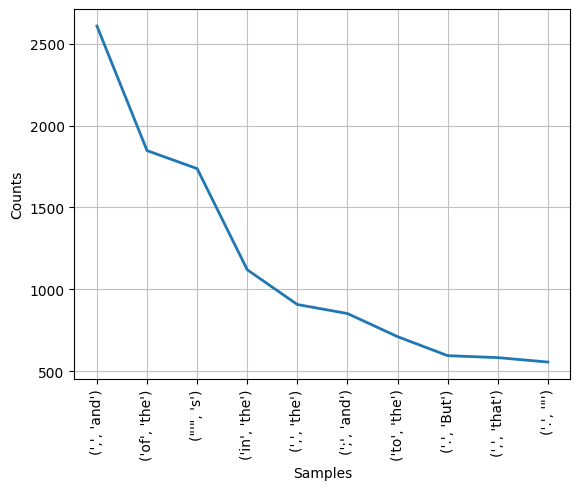

In [6]:
fdist.plot(10)

In [7]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.most_common(10)

[(('from', 'the'), 428),
 (('the', 'whale'), 369),
 (('and', 'the'), 357),
 (('with', 'the'), 308),
 (('for', 'the'), 285),
 (('into', 'the'), 246),
 (('the', 'ship'), 235),
 (('the', 'sea'), 223),
 (('upon', 'the'), 216),
 (('that', 'the'), 215)]

In [31]:
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) >= 5 and fdist[bigram[1]] > 50]
filtered_bigrams

[]

<Axes: xlabel='Samples', ylabel='Counts'>

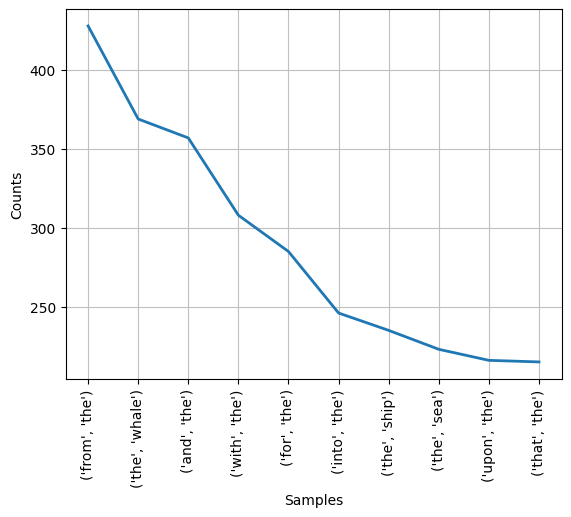

In [8]:
filtered_dist.plot(10)

In [9]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

<Axes: xlabel='Samples', ylabel='Counts'>

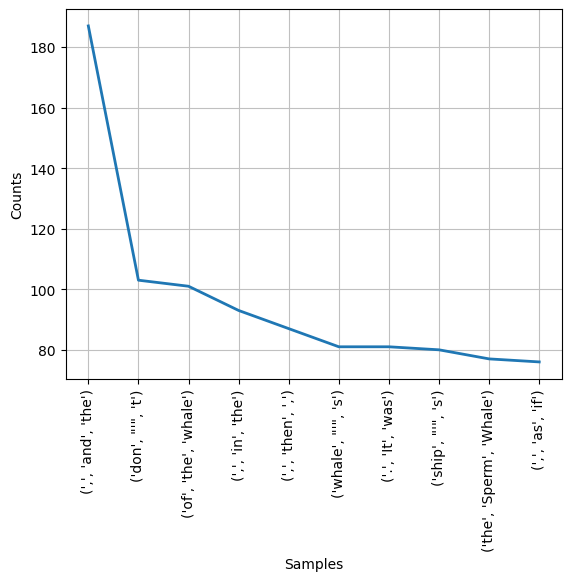

In [10]:
fdist.plot(10)

In [11]:
md_bigrams = list(bigrams(text1))
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word) > threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq']= df['bi_grams'].apply(lambda x: filtered_bigrams_dist[x])
df['word0_freq']= df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word1_freq']= df['word_1'].apply(lambda x: filtered_word_dist[x])
df


bi_grams       word_0    word_1  bi_gram_freq  word0_freq  \
0             (hands, began)        hands     began             1         123   
1             (they, grease)         they    grease             1         586   
2           (Some, sprained)         Some  sprained             1          38   
3               (was, small)          was     small             3        1632   
4                (And, didn)          And      didn             1         369   
...                      ...          ...       ...           ...         ...   
67937     (grimly, clinging)       grimly  clinging             1           3   
67938    (plainly, perceive)      plainly  perceive             1          39   
67939            (was, then)          was      then            11        1632   
67940  (expectantly, poised)  expectantly    poised             1           2   
67941         (his, outside)          his   outside             1        2459   

       word1_freq  
0              53  
1               2  
2               3  
3             125  
4              22  
...           ...  
67937           8  
67938           8  
67939         571  
67940           3  
67941           6  

[67942 rows x 6 columns]

In [12]:
df['PMI'] = df[['bi_gram_freq', 'word0_freq', 'word1_freq']].apply(lambda x: np.log2(x[0] / (x[1] * x[2])), axis=1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

/tmp/ipykernel_105551/1163314261.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['PMI'] = df[['bi_gram_freq', 'word0_freq', 'word1_freq']].apply(lambda x: np.log2(x[0] / (x[1] * x[2])), axis=1)


bi_grams       word_0    word_1  bi_gram_freq  word0_freq  \
0             (hands, began)        hands     began             1         123   
1             (they, grease)         they    grease             1         586   
2           (Some, sprained)         Some  sprained             1          38   
3               (was, small)          was     small             3        1632   
4                (And, didn)          And      didn             1         369   
...                      ...          ...       ...           ...         ...   
67937     (grimly, clinging)       grimly  clinging             1           3   
67938    (plainly, perceive)      plainly  perceive             1          39   
67939            (was, then)          was      then            11        1632   
67940  (expectantly, poised)  expectantly    poised             1           2   
67941         (his, outside)          his   outside             1        2459   

       word1_freq        PMI  log(bi_gram_freq)  
0              53 -12.670435           0.000000  
1               2 -10.194757           0.000000  
2               3  -6.832890           0.000000  
3             125 -16.053247           1.584963  
4              22 -12.986909           0.000000  
...           ...        ...                ...  
67937           8  -4.584963           0.000000  
67938           8  -8.285402           0.000000  
67939         571 -16.370341           3.459432  
67940           3  -2.584963           0.000000  
67941           6 -13.848819           0.000000  

[67942 rows x 8 columns]

In [13]:
df.sort_values(by = 'PMI', ascending = False)

bi_grams     word_0     word_1  bi_gram_freq  word0_freq  \
32748          (Trade, Winds)      Trade      Winds             1           1   
67910  (chivalric, Crusaders)  chivalric  Crusaders             1           1   
67920      (Belial, bondsman)     Belial   bondsman             1           1   
39     (eminently, presuming)  eminently  presuming             1           1   
46054     (soberly, recurred)    soberly   recurred             1           1   
...                       ...        ...        ...           ...         ...   
52787              (man, the)        man        the             1         508   
39654             (some, the)       some        the             1         578   
23531              (one, the)        one        the             1         889   
58172              (the, not)        the        not             1       13721   
43614              (the, but)        the        but             1       13721   

       word1_freq        PMI  log(bi_gram_freq)  
32748           1   0.000000                0.0  
67910           1   0.000000                0.0  
67920           1   0.000000                0.0  
39              1   0.000000                0.0  
46054           1   0.000000                0.0  
...           ...        ...                ...  
52787       13721 -22.732783                0.0  
39654       13721 -22.919024                0.0  
23531       13721 -23.540138                0.0  
58172        1103 -23.851315                0.0  
43614        1113 -23.864336                0.0  

[67942 rows x 8 columns]

In [14]:
fig = px.scatter(x=df['PMI'].values, y=df['log(bi_gram_freq)'].values, color= df['PMI'] + df['log(bi_gram_freq)'], hover_name=df['bi_grams'].values, width=600, height=600, labels={
    'x': 'PMI',
    'y': 'log(bi_gram_freq)',
}, title='PMI vs log(bi_gram_freq)')

In [15]:
fig.show()

In [16]:
from nltk.collections import *
from nltk.collocations import BigramCollocationFinder

bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [17]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

In [18]:
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()

[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/brian02oriel/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [19]:
flatten_corpus = [w for l in corpus for w in l]
flatten_corpus

['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',',
 'jueves',
 ',',
 'la',
 'compra',
 'del',
 '51_por_ciento',
 'de',
 'la',
 'empresa',
 'mexicana',
 'Electricidad_Águila_de_Altamira',
 '-Fpa-',
 'EAA',
 '-Fpt-',
 ',',
 'creada',
 'por',
 'el',
 'japonés',
 'Mitsubishi_Corporation',
 'para',
 'poner_en_marcha',
 'una',
 'central',
 'de',
 'gas',
 'de',
 '495',
 'megavatios',
 '.',
 'Una',
 'portavoz',
 'de',
 'EDF',
 'explicó',
 'a',
 'EFE',
 'que',
 'el',
 'proyecto',
 'para',
 'la',
 'construcción',
 'de',
 'Altamira_2',
 ',',
 'al',
 'norte',
 'de',
 'Tampico',
 ',',
 'prevé',
 'la',
 'utilización',
 'de',
 'gas',
 'natural',
 'como',
 'combustible',
 'principal',
 'en',
 'una',
 'central',
 'de',
 'ciclo',
 'combinado',
 'que',
 'debe',
 'empezar',
 'a',
 'funcionar',
 'en',
 'mayo_del_2002',
 '.',
 'La',
 'electricidad',
 'producida',
 'pasará',
 'a',
 'la',
 'red',
 'eléctrica',
 'pública',
 'de',
 'México',
 'en_virtud_

In [20]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

In [22]:
arr = ['vamos', 'a', 'ver', 'a', 'que', 'tipo', 'de', 'moneda', 'vamos', 'a', 'convertir']
fdist = FreqDist(arr)
fdist.most_common(2)

[('a', 3), ('vamos', 2)]